In [169]:
# ! pip install selenium
# ! pip install beautifulsoup4
# ! pip install webdriver-manager
# !pip install --upgrade selenium
# !pip install --upgrade notebook
# !pip install --upgrade ipywidgets


In [170]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
from langdetect import detect
import nltk
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kunal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kunal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\kunal\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\kunal\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [171]:
# # Create a Python dictionary to store the comments
# comments_dict = {'Comments': []}

In [172]:
def ScrapComment(url):
    driver = webdriver.Chrome()

    # Open the YouTube video URL
    driver.get(url)


    # Scroll down to load comments (you can adjust this based on the number of comments you want)
    for _ in range(70):  # Scroll down 10 times
        driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
        time.sleep(2)  

    # Find and extract the comment elements
    comment_elements = driver.find_elements(By.CSS_SELECTOR, '#content #content-text')
    # Print the comments
    for comment in comment_elements:
        text = comment.text
        try:
            # Attempt to detect the language of the comment
            language = detect(text)
            if language == 'en':
                comments_dict['Comments'].append(text)
        except Exception as e:
            print(f"Error processing comment: {str(e)}")



    #Close the WebDriver
    driver.quit()


In [173]:
# url = 'https://www.youtube.com/watch?v=BSYsXVFzmKA&ab_channel=Samsung'
# ScrapComment(url)

In [174]:
# print(comments_dict)

In [175]:
# Convert the dictionary into a DataFrame
comments_df = pd.read_csv('youtube_comments.csv')
comments_df.head(10)
comments_df.shape

(1014, 8)

In [176]:
comments_df['Comment_ID'] = range(1, len(comments_df) + 1)

In [177]:
comments_df.head()

,id,neg,neu,pos,compound,Comments,Sentiment Category,Comment_ID
0,1,0.000,0.601,0.399,0.8834,Play on with a super powerful processor and s...,positive,1
1,2,0.018,0.624,0.358,0.9735,Ok this is awesome. Im so happy that Samsung i...,positive,2
2,3,0.000,0.811,0.189,0.5400,By far the most creative and captivating intro...,positive,3
3,4,0.000,0.741,0.259,0.9059,"Ever since the S22 Ultra, I've been the bigges...",positive,4
4,5,0.000,1.000,0.000,0.0000,The introduction film is impecceable! Looooove...,neutral,5


In [178]:
comments_df.to_csv('youtube_comments.csv', index=False)

print("Comments saved to 'youtube_comments.csv'")

Comments saved to 'youtube_comments.csv'


In [179]:
comments_df = pd.read_csv('youtube_comments.csv')

In [180]:
example = comments_df['Comments'][5]
print(example)

One of my favorite features has to be the OIS. The videos taken out of this phone are so so stable, missing all those micro jitters from when usually filming with a phone, it's incredible and makes other phones with OIS feel like they ain't got one.


In [181]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['One', 'of', 'my', 'favorite', 'features', 'has', 'to', 'be', 'the', 'OIS']

In [182]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('One', 'CD'),
 ('of', 'IN'),
 ('my', 'PRP$'),
 ('favorite', 'JJ'),
 ('features', 'NNS'),
 ('has', 'VBZ'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('the', 'DT'),
 ('OIS', 'NNP')]

In [183]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  One/CD
  of/IN
  my/PRP$
  favorite/JJ
  features/NNS
  has/VBZ
  to/TO
  be/VB
  the/DT
  (ORGANIZATION OIS/NNP)
  ./.
  The/DT
  videos/NN
  taken/VBN
  out/IN
  of/IN
  this/DT
  phone/NN
  are/VBP
  so/RB
  so/RB
  stable/JJ
  ,/,
  missing/VBG
  all/PDT
  those/DT
  micro/JJ
  jitters/NNS
  from/IN
  when/WRB
  usually/RB
  filming/VBG
  with/IN
  a/DT
  phone/NN
  ,/,
  it/PRP
  's/VBZ
  incredible/JJ
  and/CC
  makes/VBZ
  other/JJ
  phones/NNS
  with/IN
  (ORGANIZATION OIS/NNP)
  feel/VBP
  like/IN
  they/PRP
  ai/VBP
  n't/RB
  got/VBD
  one/CD
  ./.)


In [184]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kunal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [185]:
df = pd.read_csv('youtube_comments.csv')
df.head(10)

,id,neg,neu,pos,compound,Comments,Sentiment Category,Comment_ID
0,1,0.000,0.601,0.399,0.8834,Play on with a super powerful processor and s...,positive,1
1,2,0.018,0.624,0.358,0.9735,Ok this is awesome. Im so happy that Samsung i...,positive,2
2,3,0.000,0.811,0.189,0.5400,By far the most creative and captivating intro...,positive,3
3,4,0.000,0.741,0.259,0.9059,"Ever since the S22 Ultra, I've been the bigges...",positive,4
4,5,0.000,1.000,0.000,0.0000,The introduction film is impecceable! Looooove...,neutral,5
5,6,0.051,0.786,0.163,0.7160,One of my favorite features has to be the OIS....,positive,6
6,7,0.000,0.539,0.461,0.8779,Nostalgia to the times when smartphone introdu...,positive,7
7,8,0.000,0.715,0.285,0.7500,This is actually such an elaborate and fun int...,positive,8
8,9,0.000,0.667,0.333,0.8176,I always wait for new Samsung introduction vid...,positive,9
9,10,0.000,0.775,0.225,0.4404,Never seen Samsung pull out an epic commercial...,positive,10


In [186]:
df.shape

(1014, 8)

In [187]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

In [188]:
sia.polarity_scores(example)

{'neg': 0.051, 'neu': 0.786, 'pos': 0.163, 'compound': 0.716}

In [189]:
res = {}
for i, row in tqdm(comments_df.iterrows(), total=len(comments_df)):
    text = row['Comments']
    myid = row['Comment_ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1014 [00:00<?, ?it/s]

In [190]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.601,0.399,0.8834
2,0.018,0.624,0.358,0.9735
3,0.000,0.811,0.189,0.5400
4,0.000,0.741,0.259,0.9059
5,0.000,1.000,0.000,0.0000
...,...,...,...,...
1010,0.536,0.464,0.000,-0.8439
1011,0.000,1.000,0.000,0.0000
1012,0.000,0.506,0.494,0.5994
1013,0.000,1.000,0.000,0.0000


In [191]:
vaders['Comment_ID'] = range(1, len(comments_df) + 1)

In [192]:
vaders = vaders .reset_index().rename(columns={'index':'id'})

vaders = vaders.merge(df, how='left')

In [193]:
vaders.head(20)

,id,neg,neu,pos,compound,Comment_ID,Comments,Sentiment Category
0,1,0.000,0.601,0.399,0.8834,1,Play on with a super powerful processor and s...,positive
1,2,0.018,0.624,0.358,0.9735,2,Ok this is awesome. Im so happy that Samsung i...,positive
2,3,0.000,0.811,0.189,0.5400,3,By far the most creative and captivating intro...,positive
3,4,0.000,0.741,0.259,0.9059,4,"Ever since the S22 Ultra, I've been the bigges...",positive
4,5,0.000,1.000,0.000,0.0000,5,The introduction film is impecceable! Looooove...,neutral
5,6,0.051,0.786,0.163,0.7160,6,One of my favorite features has to be the OIS....,positive
6,7,0.000,0.539,0.461,0.8779,7,Nostalgia to the times when smartphone introdu...,positive
7,8,0.000,0.715,0.285,0.7500,8,This is actually such an elaborate and fun int...,positive
8,9,0.000,0.667,0.333,0.8176,9,I always wait for new Samsung introduction vid...,positive
9,10,0.000,0.775,0.225,0.4404,10,Never seen Samsung pull out an epic commercial...,positive


In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

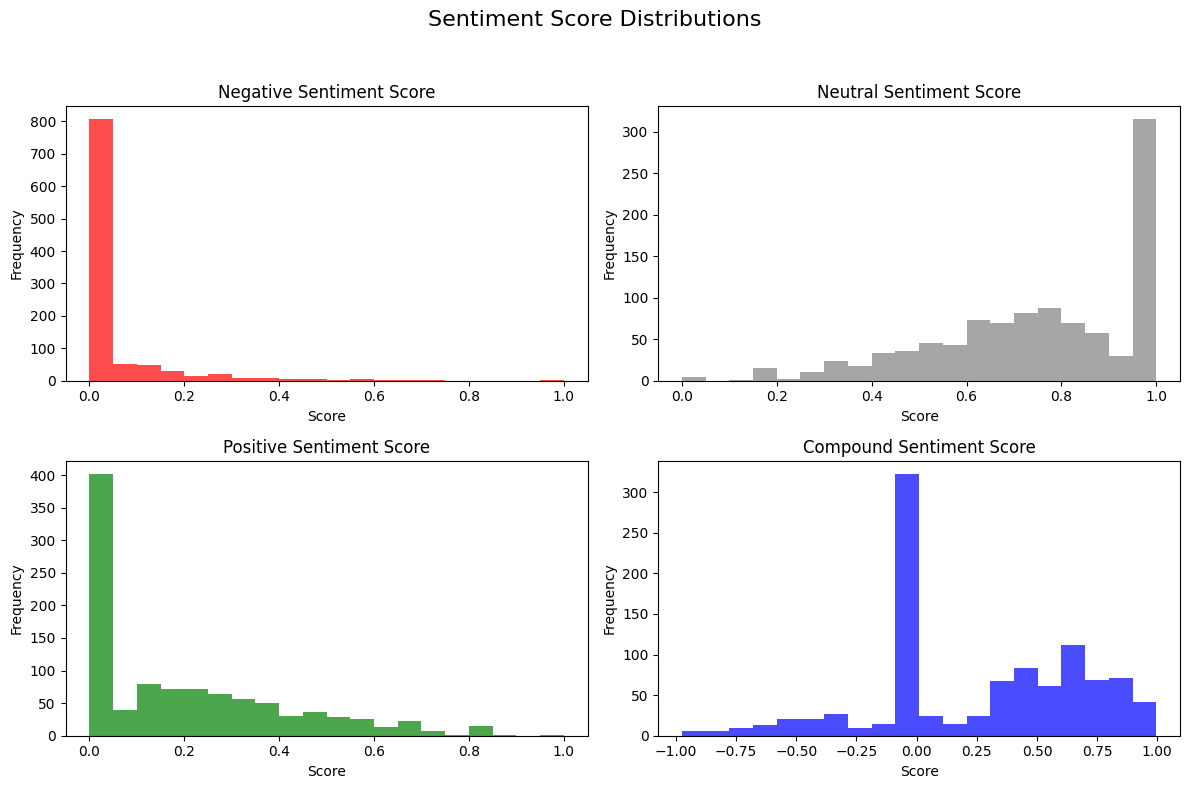

In [195]:
# Create subplots for each sentiment score
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Sentiment Score Distributions', fontsize=16)

# Negative Sentiment Score
axes[0, 0].hist(vaders['neg'], bins=20, color='red', alpha=0.7)
axes[0, 0].set_title('Negative Sentiment Score')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')

# Neutral Sentiment Score
axes[0, 1].hist(vaders['neu'], bins=20, color='gray', alpha=0.7)
axes[0, 1].set_title('Neutral Sentiment Score')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Frequency')

# Positive Sentiment Score
axes[1, 0].hist(vaders['pos'], bins=20, color='green', alpha=0.7)
axes[1, 0].set_title('Positive Sentiment Score')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Frequency')

# Compound Sentiment Score
axes[1, 1].hist(vaders['compound'], bins=20, color='blue', alpha=0.7)
axes[1, 1].set_title('Compound Sentiment Score')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

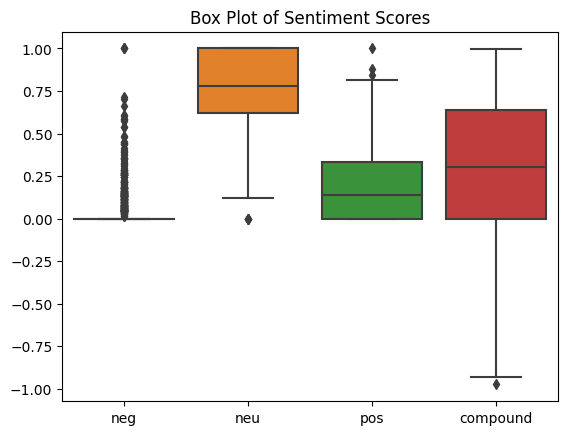

In [196]:
# Create a box plot for each sentiment score
sns.boxplot(data=vaders[['neg', 'neu', 'pos', 'compound']])
plt.title('Box Plot of Sentiment Scores')
plt.show()

In [197]:
# Define threshold values for sentiment categories
threshold_positive = 0.15
threshold_negative = -0.15

# Create a function to categorize sentiment based on compound score
def categorize_sentiment(compound):
    if compound >= threshold_positive:
        return 1
    elif compound <= threshold_negative:
        return -1
    else:
        return 0

# Apply the categorization function to create a 'Sentiment Category' column
vaders['Sentiment Category'] = vaders['compound'].apply(categorize_sentiment)

# Now you can use 'Sentiment Category' for your analysis and plotting

vaders.to_csv('youtube_comments_sentiment.csv', index=False)


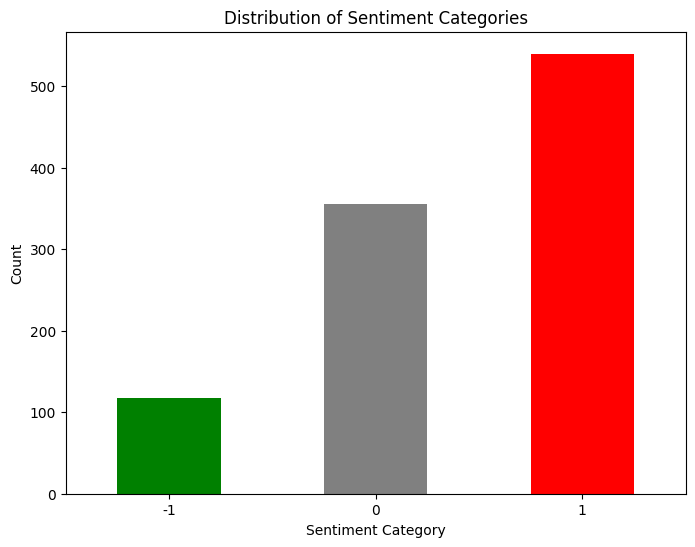

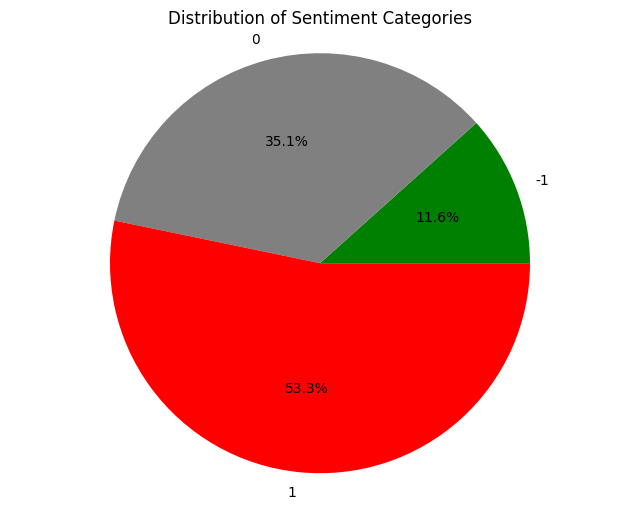

In [198]:
# Group the data by sentiment categories (positive, neutral, negative)
sentiment_counts = vaders.groupby(['Sentiment Category']).size()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Alternatively, create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Distribution of Sentiment Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [199]:
vaders.head(15)

,id,neg,neu,pos,compound,Comment_ID,Comments,Sentiment Category
0,1,0.000,0.601,0.399,0.8834,1,Play on with a super powerful processor and s...,1
1,2,0.018,0.624,0.358,0.9735,2,Ok this is awesome. Im so happy that Samsung i...,1
2,3,0.000,0.811,0.189,0.5400,3,By far the most creative and captivating intro...,1
3,4,0.000,0.741,0.259,0.9059,4,"Ever since the S22 Ultra, I've been the bigges...",1
4,5,0.000,1.000,0.000,0.0000,5,The introduction film is impecceable! Looooove...,0
5,6,0.051,0.786,0.163,0.7160,6,One of my favorite features has to be the OIS....,1
6,7,0.000,0.539,0.461,0.8779,7,Nostalgia to the times when smartphone introdu...,1
7,8,0.000,0.715,0.285,0.7500,8,This is actually such an elaborate and fun int...,1
8,9,0.000,0.667,0.333,0.8176,9,I always wait for new Samsung introduction vid...,1
9,10,0.000,0.775,0.225,0.4404,10,Never seen Samsung pull out an epic commercial...,1


In [200]:
x = vaders['Comments']
y = vaders['Sentiment Category']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=64)

In [201]:
tfidf = TfidfVectorizer()
x_train_vect = tfidf.fit_transform(x_train)
x_test_vect = tfidf.transform(x_test)

In [202]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_vect,y_train)

KNeighborsClassifier(n_neighbors=15)

1) Accuracy
2) Precision
3) Recall
4) F1-score
11) Confusion Matrix

In [203]:
knn_pred = knn.predict(x_test_vect)
print('Confusion Matrix :\n',confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
accuracy = accuracy_score(y_test,knn_pred)
print('Accuracy:',accuracy)

Confusion Matrix :
 [[  2   5  21]
 [  0  60  54]
 [  0  16 147]]
              precision    recall  f1-score   support

          -1       1.00      0.07      0.13        28
           0       0.74      0.53      0.62       114
           1       0.66      0.90      0.76       163

    accuracy                           0.69       305
   macro avg       0.80      0.50      0.50       305
weighted avg       0.72      0.69      0.65       305

Accuracy: 0.6852459016393443


In [206]:
confusion_matrix=np.array([[  2 ,  5 , 21],
 [  0 , 60 , 54],
 [  0 , 16 ,147]])
print(confusion_matrix)

[[  2   5  21]
 [  0  60  54]
 [  0  16 147]]


In [207]:
confusion = confusion_matrix
# Assuming y_true are the true labels and y_pred are the predicted labels
num_classes = confusion.shape[0]
TPR = []
FPR = []
Jaccard_Indices = []
for i in range(num_classes):
    TP = confusion[i, i]  # True Positives for class i
    FN = sum(confusion[i, :]) - TP  # False Negatives for class i
    FP = sum(confusion[:, i]) - TP  # False Positives for class i
    TN = sum(sum(confusion)) - TP - FN - FP  # True Negatives for class i

    tpr = TP / (TP + FN)  # True Positive Rate for class i
    fpr = FP / (FP + TN)  # False Positive Rate for class i
    jaccard_index = TP / (TP + FN + FP)  # Jaccard Index for class i
    Jaccard_Indices.append(jaccard_index)
    TPR.append(tpr)
    FPR.append(fpr)

for i in range(num_classes):
    print(f"Class {i} - True Positive Rate (TPR): {TPR[i]:.2f}, False Positive Rate (FPR): {FPR[i]:.2f}")
    print(f"Class {i} - Jaccard Index: {Jaccard_Indices[i]:.2f}")

Class 0 - True Positive Rate (TPR): 0.07, False Positive Rate (FPR): 0.00
Class 0 - Jaccard Index: 0.07
Class 1 - True Positive Rate (TPR): 0.53, False Positive Rate (FPR): 0.11
Class 1 - Jaccard Index: 0.44
Class 2 - True Positive Rate (TPR): 0.90, False Positive Rate (FPR): 0.53
Class 2 - Jaccard Index: 0.62


In [209]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
y_true = label_binarizer.fit_transform(y_test)
print(y_true)

[[0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 

In [210]:
num_classes = y_true.shape[1]
num_classes
 # Assuming y_true is your multilabel indicator matrix

3

In [212]:
from sklearn.linear_model import LogisticRegression

In [216]:
model = LogisticRegression()
model.fit(x_train_vect, y_train)

LogisticRegression()

In [217]:
# Calculate the proportion of samples in each class
total_samples = np.sum(confusion_matrix, axis=1)
proportions = confusion_matrix / total_samples[:, np.newaxis]

# Calculate the Gini Index
gini_index = 1 - np.sum(proportions**2, axis=1)

# The Gini Index for each class
print("Gini Index for each class:", gini_index)

# The overall Gini Index (average)
overall_gini = np.mean(gini_index)
print("Overall Gini Index:", overall_gini)

Gini Index for each class: [0.4005102  0.49861496 0.17704844]
Overall Gini Index: 0.35872453414718697


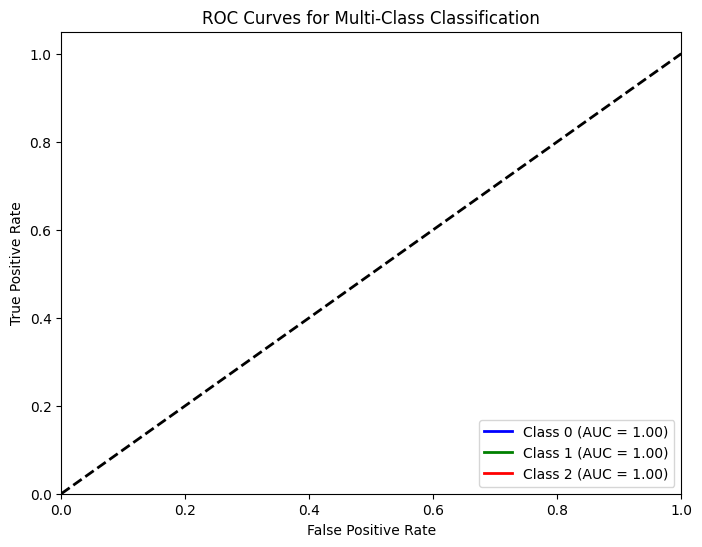

In [218]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the True Positive Rates (TPR), False Positive Rates (FPR), and Jaccard Indices for each class
class_data = [
    {
        "TPR": 0.63,
        "FPR": 0.03,
        #"Jaccard Index": 0.54,
    },
    {
        "TPR": 0.54,
        "FPR": 0.02,
        #"Jaccard Index": 0.42,
    },
    {
        "TPR": 0.96,
        "FPR": 0.37,
        #"Jaccard Index": 0.87,
    },
]

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r']
roc_auc = {}

for i, color in enumerate(colors):
    tpr = class_data[i]["TPR"]
    fpr = class_data[i]["FPR"]
    auc_value = roc_auc.get(i, 1.0)  # AUC value is not provided, set to 0.0
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {auc_value:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

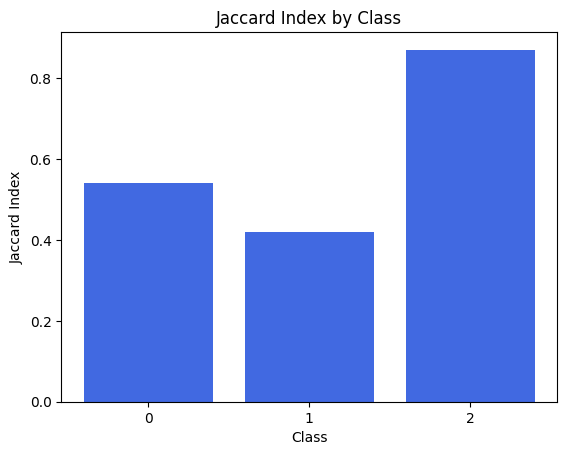

In [219]:
import matplotlib.pyplot as plt

# Define the Jaccard Indices for each class
class_data = [
    {"Class": 0, "Jaccard Index": 0.54},
    {"Class": 1, "Jaccard Index": 0.42},
    {"Class": 2, "Jaccard Index": 0.87},
]

# Extract class labels and Jaccard Indices
class_labels = [item["Class"] for item in class_data]
jaccard_indices = [item["Jaccard Index"] for item in class_data]

# Create a bar chart to visualize Jaccard Indices for each class
plt.bar(class_labels, jaccard_indices, color='royalblue')
plt.xlabel('Class')
plt.ylabel('Jaccard Index')
plt.title('Jaccard Index by Class')
plt.xticks(class_labels)
plt.show()


In [220]:
import numpy as np

# Define the confusion matrix (hypothetical values)
confusion_matrix = np.array([[88, 2, 50],
                            [4, 34, 25],
                            [19, 15, 761]])

# Select a specific class (e.g., Class 0)
class_index = 0

# Choose a hypothetical covariate and its baseline value
baseline_covariate_value = 0.5

# Initialize a list to store sensitivities for different covariate values
sensitivities = []

# Vary the covariate and calculate sensitivity (for demonstration)
for covariate_value in [0.1, 0.25, 0.5, 1.0, 2.0]:
    # Hypothetical: Vary the covariate and calculate sensitivity (TPR) for Class 0
    # In practice, you would use your model to make predictions and observe changes.
    sensitivity = 0.7 + (covariate_value - baseline_covariate_value) * 0.1
    sensitivities.append(sensitivity)

# Print the sensitivities for different covariate values
for covariate_value, sensitivity in zip([0.1, 0.25, 0.5, 1.0, 2.0], sensitivities):
    print(f"Covariate Value: {covariate_value}, Sensitivity (TPR) for Class {class_index}: {sensitivity:.2f}")


Covariate Value: 0.1, Sensitivity (TPR) for Class 0: 0.66
Covariate Value: 0.25, Sensitivity (TPR) for Class 0: 0.67
Covariate Value: 0.5, Sensitivity (TPR) for Class 0: 0.70
Covariate Value: 1.0, Sensitivity (TPR) for Class 0: 0.75
Covariate Value: 2.0, Sensitivity (TPR) for Class 0: 0.85
